# First look at using database to quickly graph potential metrics

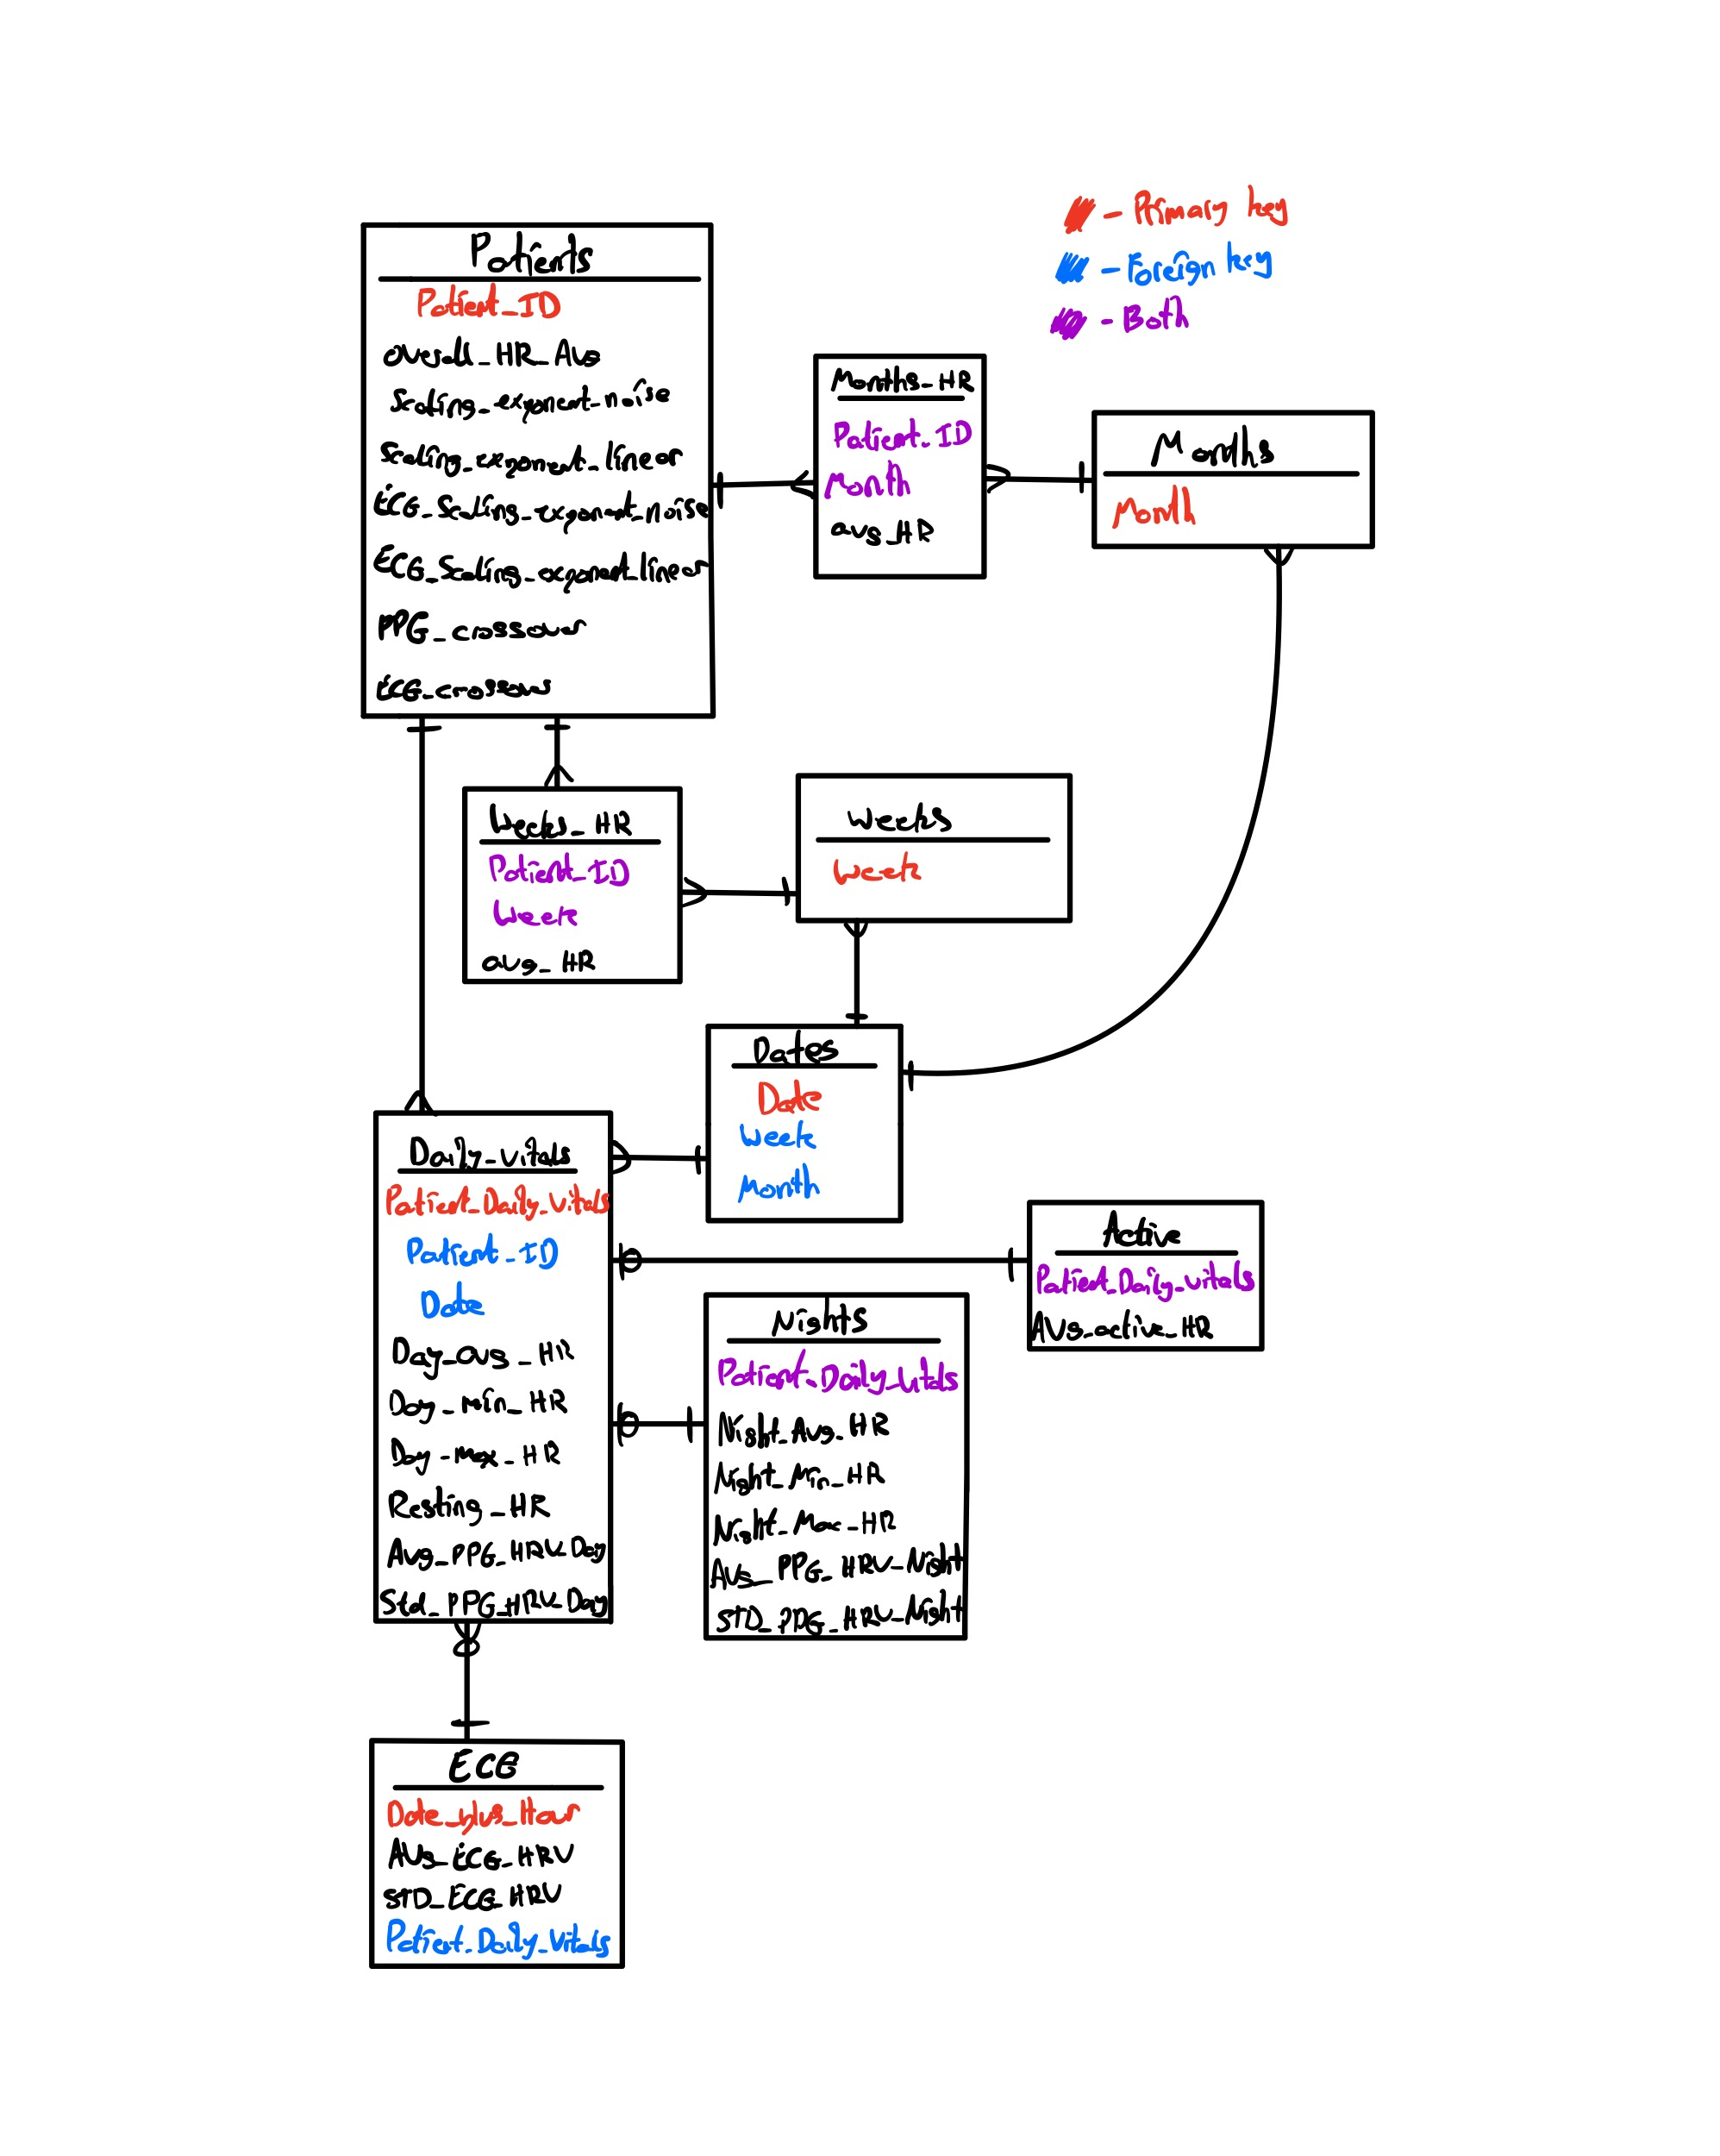

In [81]:
from IPython.display import Image
Image(filename='RelationalDatabase.jpg') 

# list of possible metrics

https://pmc.ncbi.nlm.nih.gov/articles/PMC5624990/
- to maybe add to analysis:
    - distribution of RR intervals
    - RR poincaré plot


- Average HR over whole time
- Average HR by week
- Average HR by month
- HR range per day
- HR max per day
- HRV standard dev. per day
- mean of the standard devs.
- HRV average per day
- average HR during activity
    - HRV standard dev. during days with activity
    - max and min HR on days with activity
    - HRV standard dev. during nights after activity
    - max and min HR during nights after activity
    - resting HR on days with activity
- resting HR per week
- resting HR per month
- resting HR per day
- scaling exponent difference after crossover
- crossover point against length of time measured
- crossover point average and standard dev. for healthy and unhealthy
- difference in resting and average hr per day


# DFA on PPG

it turns out that there is a library that does this. so i can try and implement it but its possible it wont work well with 1/HR and may be better to find peaks of HR PPG?

# Average standard deviation in PPG HRV per day

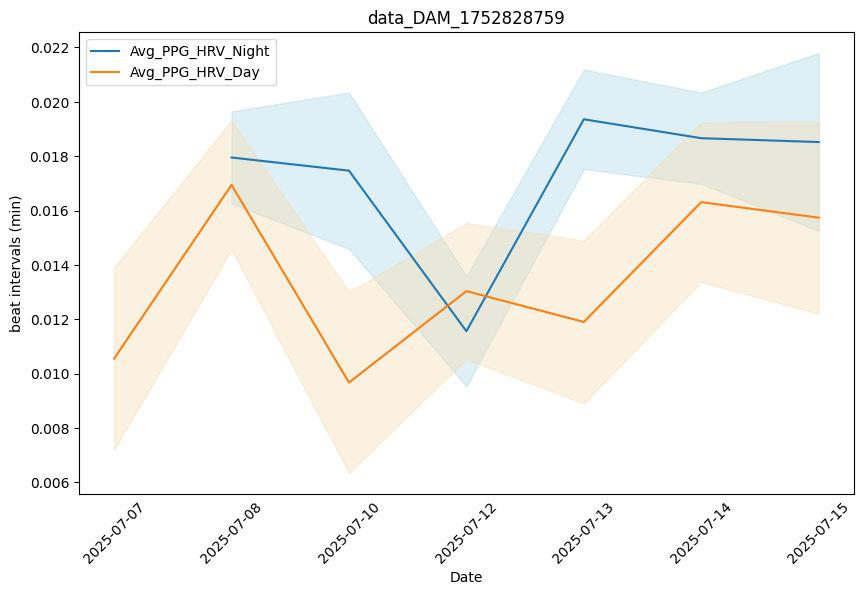

In [63]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
db_name='volunteer_metrics.db'
patient_ID='data_DAM_1752828759'
con=sqlite3.connect(db_name)
cur=con.cursor()
test_data=cur.execute("SELECT Night_Vitals.Std_PPG_HRV_Night,Daily_Vitals.Std_PPG_HRV_Day,Night_Vitals.Avg_PPG_HRV_Night,Daily_Vitals.Avg_PPG_HRV_Day,\
    Daily_Vitals.Date FROM Daily_Vitals INNER JOIN Night_Vitals on Daily_Vitals.Date_Vitals=Night_Vitals.Date_Vitals WHERE Daily_Vitals.Patient_ID=?", (patient_ID,)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)

fig,ax=plt.subplots(figsize=(10,6))
df.plot(x=c[-1],y=c[2:-1],ax=ax,ylabel='beat intervals (min)',title=patient_ID)
ax.fill_between(x=df['Date'],y1=df['Avg_PPG_HRV_Night']-df['Std_PPG_HRV_Night'],y2=df['Avg_PPG_HRV_Night']+df['Std_PPG_HRV_Night'],alpha=0.4,color='lightblue')
ax.fill_between(x=df['Date'],y1=df['Avg_PPG_HRV_Day']-df['Std_PPG_HRV_Day'],y2=df['Avg_PPG_HRV_Day']+df['Std_PPG_HRV_Day'],alpha=0.4,color='wheat')
ax.tick_params(axis='x',labelrotation=45,length=0.1)

# Average HR during activity

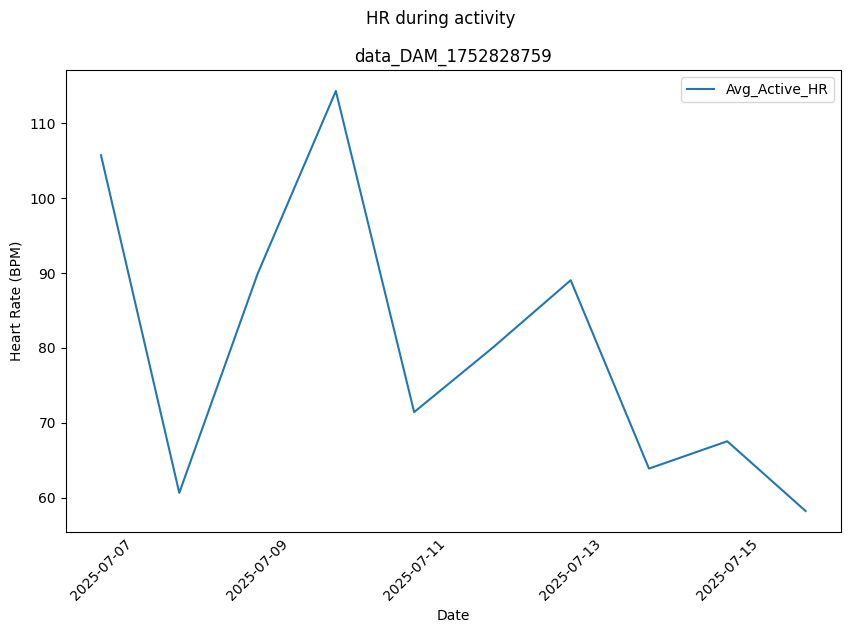

In [69]:
cur=con.cursor()
test_data=cur.execute("SELECT Activities.Avg_Active_HR ,Daily_Vitals.Date FROM Activities INNER JOIN Daily_Vitals on\
                     Activities.Date_Vitals=Daily_Vitals.Date_Vitals WHERE Daily_Vitals.Patient_ID=?", (patient_ID,)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)
fig,ax=plt.subplots(figsize=(10,6))
plt.suptitle('HR during activity')
df.plot(x=c[-1],y=c[:-1],ax=ax,ylabel='Heart Rate (BPM)',title=patient_ID)
ax.tick_params(axis='x',labelrotation=45,length=0.1)

In [68]:
cur=con.cursor()
test_data=cur.execute("SELECT Daily_Vitals.* FROM (Daily_Vitals INNER JOIN Dates ON Daily_Vitals.Date=Dates.Date) INNER JOIN Weeks on Dates.Week=Weeks.Week WHERE Weeks.Week=?",('2025-W28',)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)
print(df)

   Date_Vitals           Patient_ID        Date  Day_avg_HR  Day_min_HR  \
0            1  data_DAM_1752828759  2025-07-07  105.731500        51.0   
1            2  data_DAM_1752828759  2025-07-08   60.635593        47.0   
2            3  data_DAM_1752828759  2025-07-09   89.879802        43.0   
3            4  data_DAM_1752828759  2025-07-10  114.314629        45.0   
4            5  data_DAM_1752828759  2025-07-11   71.423729        45.0   
5            6  data_DAM_1752828759  2025-07-12   79.991935        56.0   
6            7  data_DAM_1752828759  2025-07-13   89.035956        42.0   

   Day_max_HR  Resting_HR  Avg_PPG_HRV_Day  Std_PPG_HRV_Day  
0       190.0         NaN         0.010555         0.003351  
1       123.0        52.0         0.016941         0.002378  
2       181.0        46.4         0.011909         0.003075  
3       185.0        49.6         0.009674         0.003329  
4       184.0        48.6         0.015079         0.003735  
5       139.0        69.0  

# average HR over whole period

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
db_name='patient_metrics.db'
con=sqlite3.connect(db_name)
cur=con.cursor()
overall_avg_HR_data=cur.execute("SELECT overall_HR_avg,Patient_ID FROM Patients").fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(overall_avg_HR_data,columns=c)
fig,ax=plt.subplots(figsize=(10,6))
df.plot(kind='box',x=c[-1],y=c[:-1],ax=ax,ylabel='Heart rate (Bpm)',title='average HR')
ax.tick_params(axis='x',labelrotation=45,length=0.1)
jitter = np.random.normal(loc=0, scale=0.05, size=len(df['overall_HR_avg']))
viridis=plt.colormaps['viridis']
plt.scatter(np.ones_like(df['overall_HR_avg']) + jitter/10, df['overall_HR_avg'], alpha=0.5, c=np.arange(len(df['Patient_ID'])),cmap=viridis,zorder=3, s=40,label=c[-1])

ValueError: Expected the given number of height ratios to match the number of rows of the grid

<Figure size 1000x600 with 0 Axes>

# HR per week

add heat map

/tmp/ipykernel_612866/769937591.py:29: OptimizeWarning: Covariance of the parameters could not be estimated
  popt,pcovr=curve_fit(func,xdata=np.arange(len(df[c[1]])),ydata=df[c[-1]])


   Patient_number  Gradient
0              10  0.147457
1              12  0.397001
2              17  1.642001
3              18  1.581632
4              19  0.246694
5              20  0.369007
6              29  0.329533
7              31  8.682723
8              33  0.419715
9              34  0.038451
10             35  7.904851
11             38  0.147474


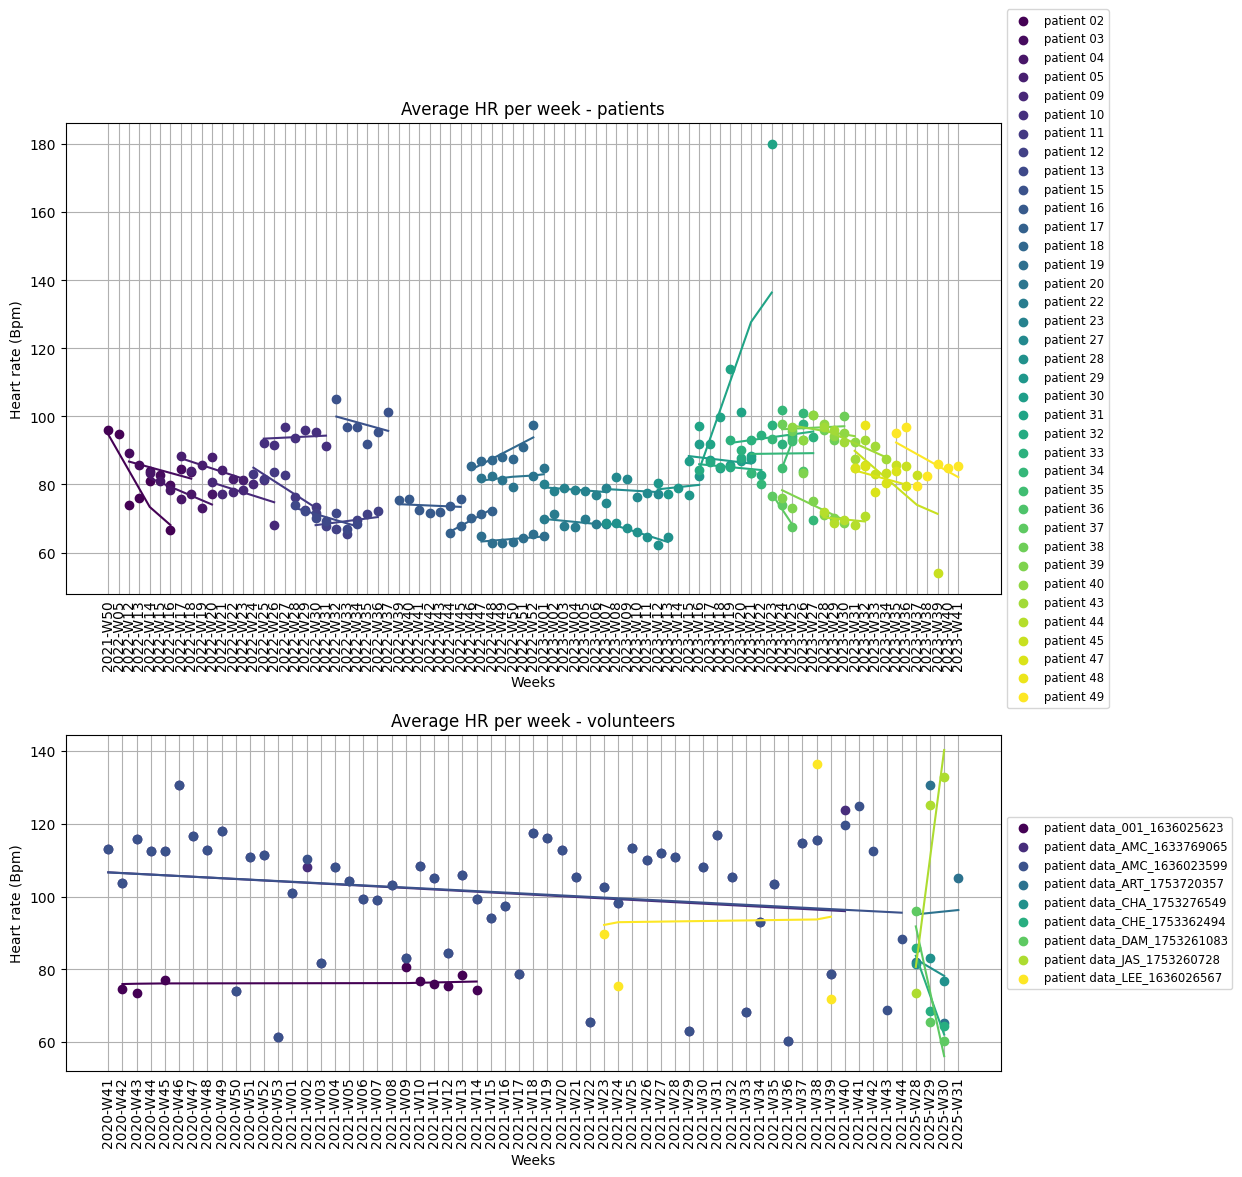

In [125]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
db_name='patient_metrics.db'
con=sqlite3.connect(db_name)

def func(x,m,c):
    return m*x+c

def weeks(con,ax,datatype=''):
    less_than_0=[]
    greater_than_0=[]
    cur=con.cursor()
    Patients=np.concatenate(np.array(cur.execute("SELECT Patient_ID FROM Patients").fetchall()))
    Weeks=np.unique(np.concatenate(np.array(cur.execute("SELECT Week FROM Weeks").fetchall())))
    week_index={week: i for i, week in enumerate(Weeks)}
    viridis=plt.colormaps['viridis']
    new_colors=viridis(np.linspace(0,1,len(Patients)))

    for i,p in enumerate(Patients):
        weeks_hr=cur.execute("SELECT Weeks_HR.* FROM Patients INNER JOIN Weeks_HR ON Patients.Patient_ID=Weeks_HR.Patient_ID WHERE Patients.Patient_ID=?",(p,)).fetchall()
        c=[description[0] for description in cur.description]
        df=pd.DataFrame(weeks_hr,columns=c)
        df['week_index']=df[c[1]].map(week_index)
        ax.scatter(x=df['week_index'],y=df[c[-1]],color=new_colors[i],label=f'patient {p}',zorder=2)
        try:
            popt,pcovr=curve_fit(func,xdata=np.arange(len(df[c[1]])),ydata=df[c[-1]])
            x=np.arange(len(df['week_index']))
            if popt[0]<0:
                less_than_0.append({'Patient_number':p,
                                    'Gradient':popt[0]})
            elif popt[0]>0:
                greater_than_0.append({'Patient_number':p,
                                    'Gradient':popt[0]})
            ax.plot(df['week_index'],popt[0]*x+popt[1],color=new_colors[i])
        except:
            pass
    ax.set_xticks(list(week_index.values()))
    ax.set_xticklabels(list(week_index.keys()), rotation=90)
    ax.tick_params(axis='x',length=0.1, width=0.1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    ax.set_xlabel('Weeks')
    ax.set_ylabel('Heart rate (Bpm)')
    ax.set_title(f'Average HR per week - {datatype}')
    ax.grid()
    return pd.DataFrame(less_than_0),pd.DataFrame(greater_than_0)

fig,ax=plt.subplots(2,1,figsize=(12,12),gridspec_kw={'height_ratios': [7,5]})
fig.tight_layout(pad=8.0)
Patient_gradients=weeks(con,ax[0],'patients')
db_name='volunteer_metrics.db'
con=sqlite3.connect(db_name)
Volunteer_gradients=weeks(con,ax[1],'volunteers')
print(Patient_gradients[1])





# poincare metrics

<Axes: ylabel='Frequency'>

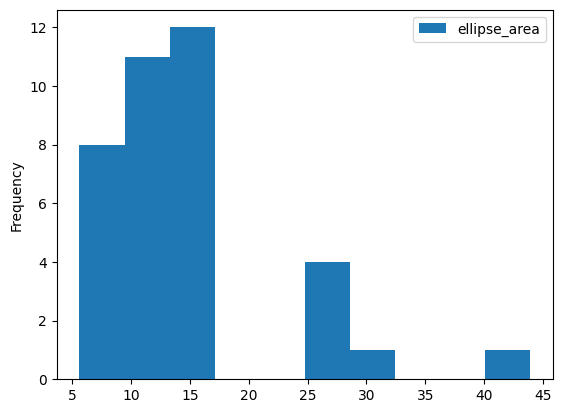

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
db_name='patient_metrics.db'
con=sqlite3.connect(db_name)
cur=con.cursor()
poincare_data=cur.execute("SELECT Patient_ID,sd1,sd2,sd_ratio,ellipse_area FROM Patients").fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(poincare_data,columns=c)
df.plot(kind='hist',x=c[0],y=c[-1])

# DFA stuff

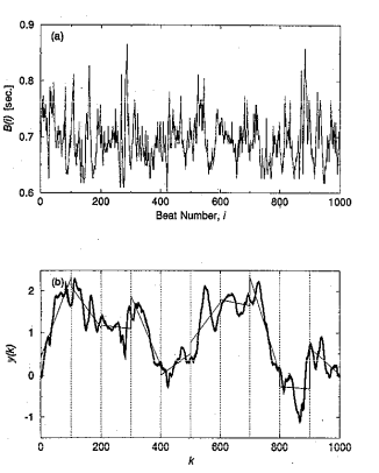

In [ ]:
from IPython.display import Image
Image(filename='Picture1.png') 


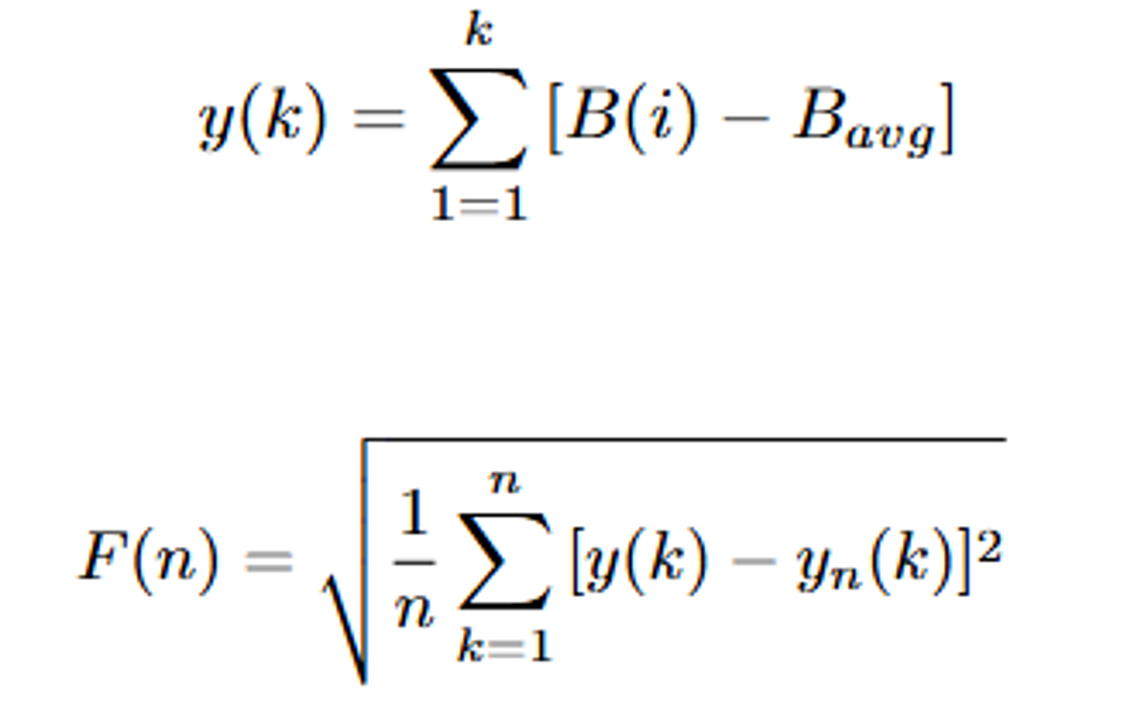

In [138]:

from IPython.display import Image
Image(filename='Picture2.png',width=500) 

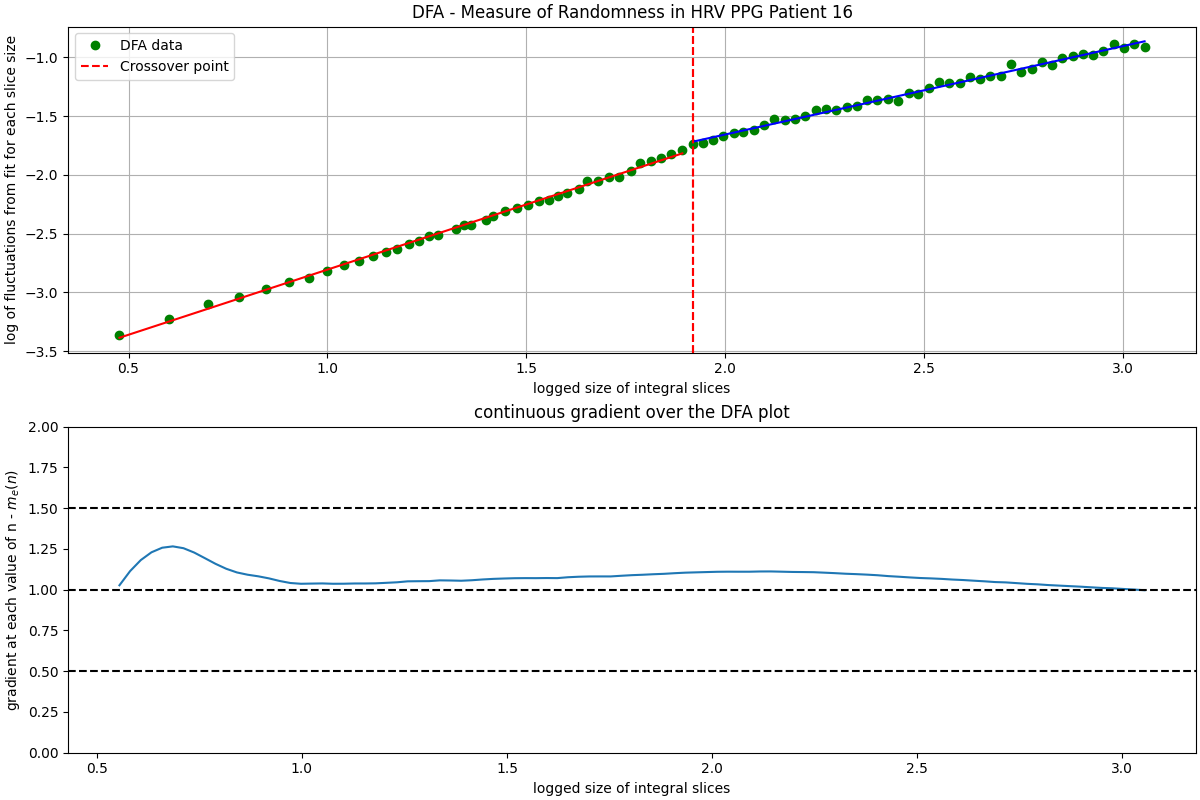

In [129]:
from IPython.display import Image
Image(filename='16-PPG.png') 

In [173]:
def fetching_DFA_data(db_name):
    #PPG
    con=sqlite3.connect(db_name)
    cur1=con.cursor()
    PPG_DFA_data=cur1.execute("SELECT Patient_ID,scaling_exponent_noise,scaling_exponent_linear,crossover_PPG FROM Patients").fetchall()
    c=[description[0] for description in cur1.description]
    PPG_df=pd.DataFrame(PPG_DFA_data,columns=c)
    PPG_df['exponent_diff']=PPG_df['scaling_exponent_linear']-PPG_df['scaling_exponent_noise']

    #ECG
    cur2=con.cursor()
    ECG_DFA_data=cur2.execute("SELECT Patient_ID,ECG_scaling_exponent_noise,ECG_scaling_exponent_linear,crossover_ECG FROM Patients").fetchall()
    c=[description[0] for description in cur2.description]
    ECG_df=pd.DataFrame(ECG_DFA_data,columns=c)
    ECG_df['exponent_diff']=ECG_df['ECG_scaling_exponent_linear']-ECG_df['ECG_scaling_exponent_noise']

    con.close()

    return PPG_df,ECG_df


def plot_PPG_data(PPG_df,ax,datatype=''):
    x_axis=np.array(PPG_df['Patient_ID'])
    se_noise=np.array(PPG_df['scaling_exponent_noise'],dtype=np.float64)
    se_linear=np.array(PPG_df['scaling_exponent_linear'],dtype=np.float64)
    diff=np.array(PPG_df['exponent_diff'],dtype=np.float64)
    ax.set_title(f'Trend–Noise DFA Exponent Differences in Smartwatch PPG Data - {datatype}')
    ax.scatter(x_axis,se_noise,marker='d',color='orange',label='noise dominant - PPG')
    ax.scatter(x_axis,se_linear,marker='D',color='blue',label='trend dominant - PPG')
    ax.tick_params(axis='x',labelrotation=-90,length=0.1)
    ax.scatter(x_axis,diff,marker='p',color='red',label='trend-noise - PPG')
    ax.vlines(x_axis,diff,0,color='red')
    ax.axhline(0,color='k')
    ax.set_xlabel('patient number')
    ax.set_ylabel('scaling exponents')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
def plot_ECG_data(ECG_df,ax,datatype=''):
    x_axis=np.array(ECG_df['Patient_ID'])
    se_noise=np.array(ECG_df['ECG_scaling_exponent_noise'],dtype=np.float64)
    se_linear=np.array(ECG_df['ECG_scaling_exponent_linear'],dtype=np.float64)
    diff=np.array(ECG_df['exponent_diff'],dtype=np.float64)
    ax.set_title(f'Trend–Noise DFA Exponent Differences in Smartwatch ECG Data - {datatype}')
    ax.scatter(x_axis,se_noise,marker='d',color='orange',label='noise dominant - ECG')
    ax.scatter(x_axis,se_linear,marker='D',color='blue',label='trend dominant - ECG')
    ax.tick_params(axis='x',labelrotation=-90,length=0.1)
    ax.scatter(x_axis,diff,marker='p',color='red',label='trend-noise - ECG')
    ax.vlines(x_axis,diff,0,color='red')
    ax.axhline(0,color='k')
    ax.set_xlabel('patient number')
    ax.set_ylabel('scaling exponents')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

def violin_plots(PPG,ECG,ax,datatype=''):
    v1=ax.violinplot(PPG,positions=[1],showmedians=True,showmeans=False,showextrema=True)
    v2=ax.violinplot(ECG,positions=[2],showmedians=True,showmeans=False,showextrema=True)
    ax.legend([v1['bodies'][0],v2['bodies'][0]], [ 'PPG data','ECG data'], loc=3)
    ax.set_title(f'violin plots of trend-noise - {datatype}')
    ax.set_ylabel('trend-noise')
    

In [89]:
from scipy.stats import ttest_1samp, ttest_rel
def t_test(data,null):
    if type(null)==int:
        t_stat, p_value = ttest_1samp(data,null,nan_policy='omit')
    else:
        t_stat, p_value = ttest_rel(data,null,nan_policy='omit')
    if p_value<0.05:
        print('t-test result is there is evidence to reject the null hypothesis with a p value of {}'.format(p_value))
    else:
        print('t-test result is that we cannot reject the null hypothesis with p value of {}'.format(p_value))
    return t_stat,p_value

----------------------------------------------------------------------
testing PPG patient exponent difference with null hypothesis of mean=0
t-test result is there is evidence to reject the null hypothesis with a p value of 0.0001685187812057343
----------------------------------------------------------------------
testing ECG patient exponent difference with null hypothesis of mean=0
t-test result is there is evidence to reject the null hypothesis with a p value of 7.784408409845584e-11
----------------------------------------------------------------------
testing PPG volunteer exponent difference with null hypothesis of mean=0
t-test result is there is evidence to reject the null hypothesis with a p value of 0.040183530375001275
----------------------------------------------------------------------
testing ECG volunteer exponent difference with null hypothesis of mean=0
t-test result is that we cannot reject the null hypothesis with p value of 0.2561770498703736
--------------------

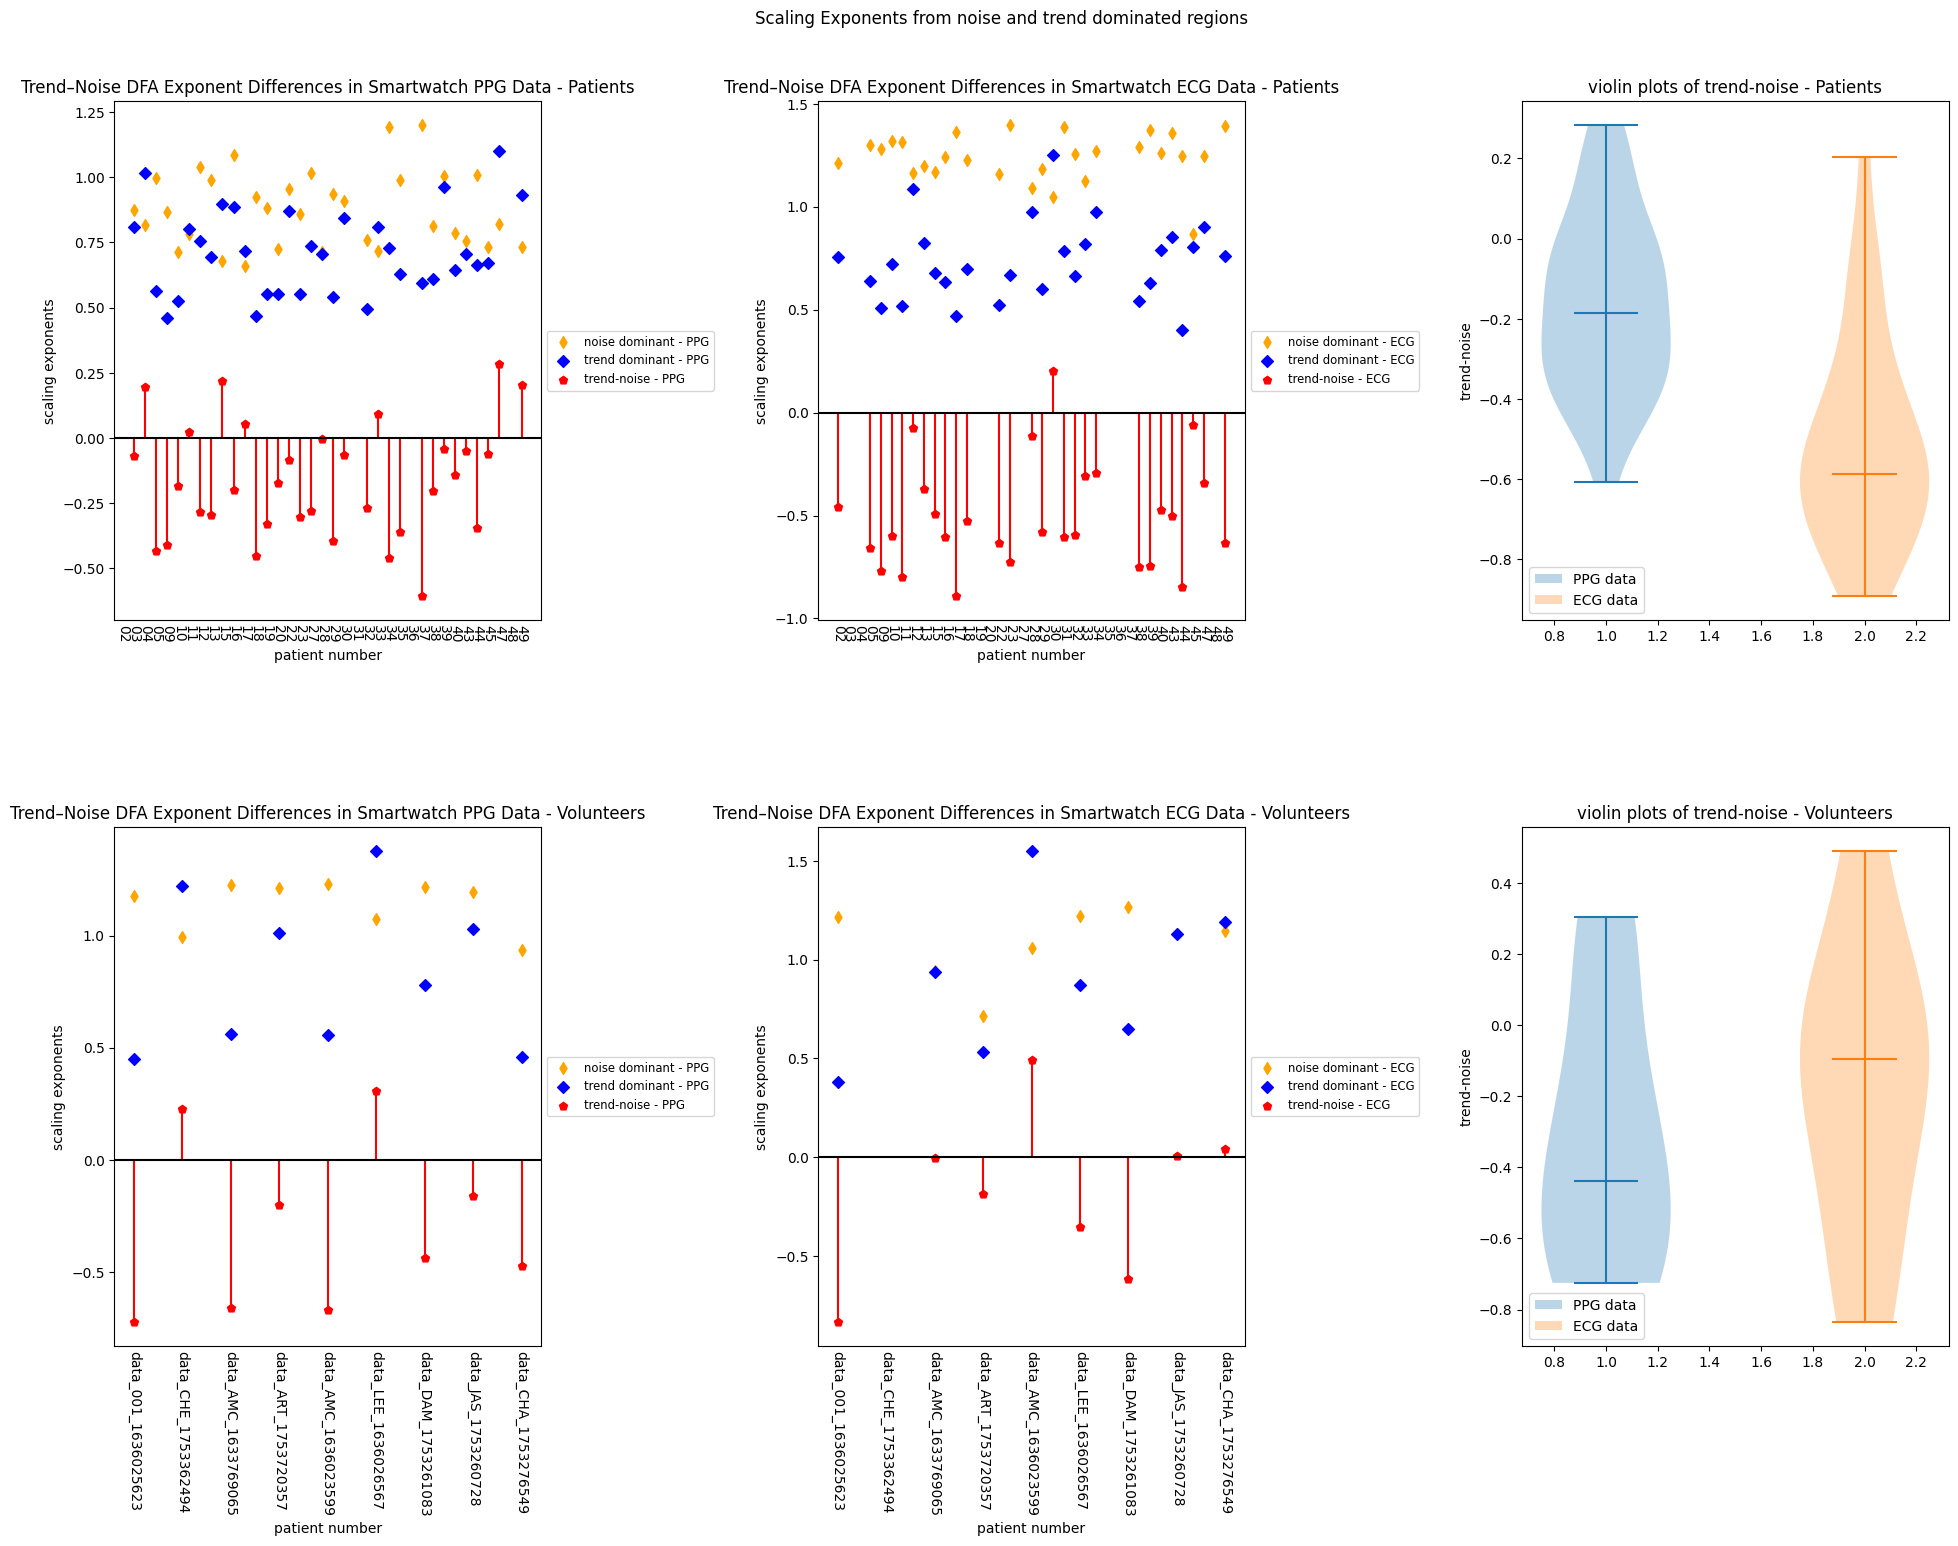

In [174]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# getting patient DFA data

db_name='patient_metrics.db'
Patient_PPG_df,Patient_ECG_df=fetching_DFA_data(db_name=db_name)

# getting volunteer DFA data

db_name='volunteer_metrics.db'
Volunteer_PPG_df,Volunteer_ECG_df=fetching_DFA_data(db_name=db_name)

# plotting patient data
fig,ax=plt.subplots(2,3,figsize=(20,16),gridspec_kw={'height_ratios': [10,10]})
plot_PPG_data(Patient_PPG_df,ax[0][0],'Patients')
plot_ECG_data(Patient_ECG_df,ax[0][1],'Patients')
plot_PPG_data(Volunteer_PPG_df,ax[1][0],'Volunteers')
plot_ECG_data(Volunteer_ECG_df,ax[1][1],'Volunteers')
fig.suptitle('Scaling Exponents from noise and trend dominated regions')
plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.4)

# stats calculations
print('----------------------------------------------------------------------')
print('testing PPG patient exponent difference with null hypothesis of mean=0')
Patient_PPG_diff=np.array(Patient_PPG_df['exponent_diff'],dtype=np.float64)
t_test(Patient_PPG_diff,0)
print('----------------------------------------------------------------------')
print('testing ECG patient exponent difference with null hypothesis of mean=0')
Patient_ECG_diff=np.array(Patient_ECG_df['exponent_diff'],dtype=np.float64)
t_test(Patient_ECG_diff,0)
print('----------------------------------------------------------------------')
print('testing PPG volunteer exponent difference with null hypothesis of mean=0')
Volunteer_PPG_diff=np.array(Volunteer_PPG_df['exponent_diff'],dtype=np.float64)
t_test(Volunteer_PPG_diff,0)
print('----------------------------------------------------------------------')
print('testing ECG volunteer exponent difference with null hypothesis of mean=0')
Volunteer_ECG_diff=np.array(Volunteer_ECG_df['exponent_diff'],dtype=np.float64)
t_test(Volunteer_ECG_diff,0)
print('----------------------------------------------------------------------')
print('\n\n\n----------------------------------------------------------------------')
print('testing PPG patient exponent difference with null hypothesis of ECG exponent difference')
t_test(Patient_ECG_diff,Patient_PPG_diff)
print('----------------------------------------------------------------------')
print('testing PPG volunteer exponent difference with null hypothesis of ECG exponent difference')
t_test(Volunteer_ECG_diff,Volunteer_PPG_diff)
print('----------------------------------------------------------------------')

Patient_ECG_diff=Patient_ECG_diff[~np.isnan(Patient_ECG_diff)]
Patient_PPG_diff=Patient_PPG_diff[~np.isnan(Patient_PPG_diff)]
Volunteer_ECG_diff=Volunteer_ECG_diff[~np.isnan(Volunteer_ECG_diff)]
Volunteer_PPG_diff=Volunteer_PPG_diff[~np.isnan(Volunteer_PPG_diff)]

violin_plots(Patient_PPG_diff,Patient_ECG_diff,ax[0][2],'Patients')
violin_plots(Volunteer_PPG_diff,Volunteer_ECG_diff,ax[1][2],'Volunteers')


# Daily Vitals

In [61]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns
from ipywidgets import interact

db_name='patient_metrics.db'
con1=sqlite3.connect(db_name)
db_name2='volunteer_metrics.db'
con2=sqlite3.connect(db_name2)
def func(x,m,c):
    return m*x+c

def Daily_PPG(con,metric_to_plot):
    # for idx,p in enumerate(Patients):
    cur2=con.cursor()
    Daily_data=cur2.execute("SELECT Daily_Vitals.* FROM Daily_Vitals").fetchall()
    c=[description[0] for description in cur2.description]
    Daily_data_df=pd.DataFrame(Daily_data,columns=c)
    Daily_data_df=Daily_data_df.drop(columns=['Date_Vitals'])
    Daily_data_df['datetimes']=pd.to_datetime(Daily_data_df['Date'])
    Daily_data_df['Day_since_start'] = Daily_data_df.groupby('Patient_ID')['datetimes'].transform(lambda x: (x - x.min()).dt.days)
    cur3=con.cursor()
    Nightly_data=cur3.execute("SELECT Daily_Vitals.Patient_ID, Daily_Vitals.Date, Night_Vitals.* FROM Night_Vitals INNER JOIN Daily_Vitals ON Night_Vitals.Date_Vitals=Daily_Vitals.Date_Vitals").fetchall()
    c=[description[0] for description in cur3.description]
    Nightly_data_df=pd.DataFrame(Nightly_data,columns=c)
    Nightly_data_df=Nightly_data_df.drop(columns=['Date_Vitals'])
    Date_data_df=Daily_data_df.merge(Nightly_data_df,how='left',on=['Date','Patient_ID'])
    pivot = Date_data_df.pivot_table(
        index='Patient_ID', 
        columns='Day_since_start', 
        values=metric_to_plot
    )
    fig,ax=plt.subplots(2,1,figsize=(20,8),layout='constrained')
    fig.suptitle(metric_to_plot)
    sns.heatmap(pivot,cmap='viridis',annot=False,ax=ax[0])
    ax[0].tick_params("y", rotation=0)

    # ax[0].set_yticks([])
    ax[0].set_title(f'heat map of {metric_to_plot} per day')
    average_trend(pivot,ax[1])

    

def average_trend(pivot,ax):
    
    avg_trend=pivot.mean(axis=0)
    std_trend=pivot.std(axis=0)
    nan_mask=~np.isnan(std_trend.values)
    avg_trend=avg_trend[nan_mask]
    std_trend=std_trend[nan_mask]
    ax.plot(avg_trend.index,avg_trend.values,label='Mean with std dev')
    ax.fill_between(avg_trend.index,avg_trend.values+std_trend.values,avg_trend.values-std_trend.values,alpha=0.3)
    ax.legend()
    ax.set_title('average with standard deviation')
    ax.set_xlabel('days since start')
    ax.set_ylabel('mean per day')


def Daily_ECG(con,metric_to_plot):
    cur=con.cursor()
    Daily_data=cur.execute("SELECT Daily_Vitals.Patient_ID,Daily_Vitals.Date,ECG_Vitals.Avg_ECG_HRV, ECG_Vitals.Std_ECG_HRV FROM ECG_Vitals INNER JOIN Daily_Vitals ON ECG_Vitals.Date_Vitals=Daily_Vitals.Date_Vitals").fetchall()
    c=[description[0] for description in cur.description]
    Daily_data_df=pd.DataFrame(Daily_data,columns=c)
    Daily_data_df['datetimes']=pd.to_datetime(Daily_data_df['Date'], format='%Y-%m-%d', errors='coerce')
    Daily_data_df['Day_since_start'] = Daily_data_df.groupby('Patient_ID')['datetimes'].transform(lambda x: (x - x.min()).dt.days)
    # print(Daily_data_df[Daily_data_df.Patient_ID=='36'])
    pivot = Daily_data_df.pivot_table(
        index='Patient_ID', 
        columns='Day_since_start', 
        values=metric_to_plot
    )
    fig,ax=plt.subplots(2,1,figsize=(20,8),layout='constrained')
    fig.suptitle(metric_to_plot)
    sns.heatmap(pivot,cmap='viridis',annot=False,ax=ax[0])
    ax[0].tick_params("y", rotation=0)
    ax[0].set_title(f'heat map of {metric_to_plot} per day')
    average_trend(pivot,ax[1])




interact(Daily_PPG,con=[con1,con2],metric_to_plot=['Std_PPG_HRV_Day','Avg_PPG_HRV_Day','Day_max_HR','Day_min_HR','Day_avg_HR','Std_PPG_HRV_Night','Avg_PPG_HRV_Night','Night_max_HR','Night_min_HR','Night_avg_HR'])

interact(Daily_ECG,con=[con1,con2],metric_to_plot=['Avg_ECG_HRV','Std_ECG_HRV'])


interactive(children=(Dropdown(description='con', options=(<sqlite3.Connection object at 0x7ff233929120>, <sql…

interactive(children=(Dropdown(description='con', options=(<sqlite3.Connection object at 0x7ff233929120>, <sql…

<function __main__.Daily_ECG(con, metric_to_plot)>

# Activities



In [126]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns
from ipywidgets import interact

db_name='patient_metrics.db'
con1=sqlite3.connect(db_name)
cur=con1.cursor()
#Patients=np.concatenate(np.array(cur.execute("SELECT Patient_ID FROM Patients").fetchall()))

Patients=np.array(Patient_gradients[0]['Patient_number'])

def Activities(con,time_span):
    cur=con.cursor()
    

    if time_span.lower()=='weeks':

        Weeks=np.unique(np.concatenate(np.array(cur.execute("SELECT Week FROM Weeks").fetchall())))
        week_index={week: i for i, week in enumerate(Weeks)}

        data=cur.execute("SELECT Daily_Vitals.Patient_ID,Weeks.Week,Activities.Avg_Active_HR FROM Activities INNER JOIN Daily_Vitals ON Activities.Date_Vitals=Daily_Vitals.Date_Vitals INNER JOIN Dates ON Daily_Vitals.Date=Dates.Date INNER JOIN Weeks on Dates.Week=Weeks.Week").fetchall()
        c=[description[0] for description in cur.description]
        data_df=pd.DataFrame(data,columns=c)

        data_df['week_index']=data_df['Week'].map(week_index)
        data_df[f'{time_span}_since_start'] = data_df.groupby('Patient_ID')['week_index'].transform(lambda x: (x - x.min()))
        # ax.scatter(x=data_df['time_since_start'],y=data_df['Avg_Active_HR'])
        # ax.set_xticks(list(week_index.values()))
        # ax.set_xticklabels(list(week_index.keys()), rotation=90) 
    
    elif time_span.lower()=='months':

        Months=np.concatenate(np.array(cur.execute("SELECT Month FROM Months").fetchall()))
        print(Months)
        Month_index={month: i for i, month in enumerate(Months)}
        print(Month_index)

        data=cur.execute("SELECT Daily_Vitals.Patient_ID,Months.Month,Activities.Avg_Active_HR FROM Activities INNER JOIN Daily_Vitals ON Activities.Date_Vitals=Daily_Vitals.Date_Vitals INNER JOIN Dates ON Daily_Vitals.Date=Dates.Date INNER JOIN Months on Dates.Month=Months.Month").fetchall()
        c=[description[0] for description in cur.description]
        data_df=pd.DataFrame(data,columns=c)

        data_df['month_index']=data_df['Month'].map(Month_index)
        data_df[f'{time_span}_since_start'] = data_df.groupby('Patient_ID')['month_index'].transform(lambda x: (x - x.min()))
    print(data_df)
    pivot = data_df.pivot_table(
        index='Patient_ID', 
        columns=f'{time_span}_since_start', 
        values='Avg_Active_HR'
    )
    

    sns.heatmap(pivot,cmap='viridis',annot=False,ax=ax)
    ax.tick_params("y", rotation=0)


def activity_against(x_axis,con,patient_num):
    fig,ax=plt.subplots(figsize=(12,8))
    cur=con.cursor()
    if x_axis.lower()=='months':
        Months=np.concatenate(np.array(cur.execute("SELECT Month FROM Months").fetchall()))
        Month_index={month: i for i, month in enumerate(Months)}
        data=cur.execute("SELECT Daily_Vitals.Patient_ID,Months.Month,Activities.Avg_Active_HR FROM Activities INNER JOIN Daily_Vitals ON Activities.Date_Vitals=Daily_Vitals.Date_Vitals INNER JOIN Dates ON Daily_Vitals.Date=Dates.Date INNER JOIN Months on Dates.Month=Months.Month WHERE Daily_Vitals.Patient_ID=? ", (patient_num,)).fetchall()
        c=[description[0] for description in cur.description]
        data_df=pd.DataFrame(data,columns=c)
        data_df['months_index']=data_df['Month'].map(Month_index)
    
        ax.set_xticks(list(Month_index.values()))
        ax.set_xticklabels(list(Month_index.keys()), rotation=90)
    
    if x_axis.lower()=='weeks':
        Weeks=np.concatenate(np.array(cur.execute("SELECT Week FROM Weeks").fetchall()))
        Week_index={week: i for i, week in enumerate(Weeks)}
        data=cur.execute("SELECT Weeks.Week,Activities.Avg_Active_HR FROM Activities INNER JOIN Daily_Vitals ON Activities.Date_Vitals=Daily_Vitals.Date_Vitals INNER JOIN Dates ON Daily_Vitals.Date=Dates.Date INNER JOIN Weeks on Dates.Week=Weeks.Week WHERE Daily_Vitals.Patient_ID=? ", (patient_num,)).fetchall()
        c=[description[0] for description in cur.description]
        data_df=pd.DataFrame(data,columns=c)
        data_df['weeks_index']=data_df['Week'].map(Week_index)
        mean_df=data_df.groupby(by='weeks_index').mean(numeric_only=True).reset_index()
        std_df=data_df.groupby(by='weeks_index').std(numeric_only=True).reset_index()
        mean_df=mean_df.merge(std_df,how='left',on=['weeks_index'])
        mean_df.columns=['weeks_index','Avg_Active_HR_mean','Avg_Active_HR_std']
        mean_df.apply(pd.to_numeric,errors='coerce')
        mean_df.fillna(0)
        print(mean_df['Avg_Active_HR_std'])
    
        ax.set_xticks(list(Week_index.values()))
        ax.set_xticklabels(list(Week_index.keys()), rotation=90)
    
    ax.scatter(x=data_df[f'{x_axis}_index'],y=data_df['Avg_Active_HR'])
    params=np.polyfit(mean_df['weeks_index'],mean_df['Avg_Active_HR_mean'],deg=1)
    y=mean_df['weeks_index']*params[0]+params[1]
    # ax.plot(mean_df['weeks_index'],y)
    sns.regplot(x='weeks_index', y='Avg_Active_HR', data=data_df, ci=95,ax=ax)
    # ax.fill_between(x=mean_df['weeks_index'],y1=y-mean_df['Avg_Active_HR_std'],y2=y+mean_df['Avg_Active_HR_std'],alpha=0.3)

#interact(Activities,con=[con1],time_span=['Weeks','Months'])
interact(activity_against,x_axis=['weeks'],con=[con1],patient_num=Patients)

interactive(children=(Dropdown(description='x_axis', options=('weeks',), value='weeks'), Dropdown(description=…

<function __main__.activity_against(x_axis, con, patient_num)>